#### Alexander Ovechkin Stats and Awards

In [135]:
# imports
import pandas as pd
import numpy as np
import zipfile
import os
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.style as style 

**Hall of Fame dataframe**

In [136]:
# read hall of fame csv file
hof = pd.read_csv('data/HOF.csv')

In [137]:
# check if Alex Ovechkin has been admitted to the hall of fame 
hof.loc[hof['name']=='Alexander Ovechkin'] 

,year,hofID,name,category


**Player awards**

In [138]:
# read awards csv file
awards = pd.read_csv('data/AwardsPlayers.csv')

In [182]:
# observe the awards given to Ovechkin
ovechkin_awards = awards.loc[awards['playerID'] == 'ovechal01'] 
ovechkin_awards.head()

,playerID,award,year,lgID,note,pos
1720,ovechal01,All-Rookie,2005,NHL,NaN,F
1723,ovechal01,Calder,2005,NHL,NaN,NaN
1730,ovechal01,First Team All-Star,2005,NHL,NaN,LW
1765,ovechal01,First Team All-Star,2006,NHL,NaN,LW
1791,ovechal01,Art Ross,2007,NHL,NaN,NaN


**Master dataframe**

In [172]:
# read master csv file
master = pd.read_csv('data/Master.csv')

In [174]:
master.columns

Index(['playerID', 'coachID', 'hofID', 'firstName', 'lastName', 'nameNote',
       'nameGiven', 'nameNick', 'height', 'weight', 'shootCatch', 'legendsID',
       'ihdbID', 'hrefID', 'firstNHL', 'lastNHL', 'firstWHA', 'lastWHA', 'pos',
       'birthYear', 'birthMon', 'birthDay', 'birthCountry', 'birthState',
       'birthCity', 'deathYear', 'deathMon', 'deathDay', 'deathCountry',
       'deathState', 'deathCity'],
      dtype='object')

In [177]:
age = 2021 - ovechkin_stats['birthYear']
age

5355   36.0
Name: birthYear, dtype: float64

In [173]:
# see Ovechkin's stats
ovechkin_stats = master.loc[master['playerID'] == 'ovechal01']
ovechkin_stats

,playerID,coachID,hofID,firstName,lastName,nameNote,nameGiven,nameNick,height,weight,...,birthDay,birthCountry,birthState,birthCity,deathYear,deathMon,deathDay,deathCountry,deathState,deathCity
5355,ovechal01,NaN,NaN,Alex,Ovechkin,NaN,Alexander Mikhaylovich,NaN,74.0,220.0,...,17.0,Russia,NaN,Moscow,NaN,NaN,NaN,NaN,NaN,NaN


**Scoring**


In [132]:
# read scoring csv file
scoring = pd.read_csv('data/Scoring.csv')

In [133]:
scoring.columns

Index(['playerID', 'year', 'stint', 'tmID', 'lgID', 'pos', 'GP', 'G', 'A',
       'Pts', 'PIM', '+/-', 'PPG', 'PPA', 'SHG', 'SHA', 'GWG', 'GTG', 'SOG',
       'PostGP', 'PostG', 'PostA', 'PostPts', 'PostPIM', 'Post+/-', 'PostPPG',
       'PostPPA', 'PostSHG', 'PostSHA', 'PostGWG', 'PostSOG'],
      dtype='object')

In [156]:
pd.options.display.float_format = '{:.1f}'.format

In [157]:
# observe stats scoring stats related to the player
ovechkin_score = scoring.loc[scoring['playerID'] == 'ovechal01']
ovechkin_score

,playerID,year,stint,tmID,lgID,pos,GP,G,A,Pts,...,PostA,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG
31653,ovechal01,2005,1,WAS,NHL,L,81.0,52.0,54.0,106.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31654,ovechal01,2006,1,WAS,NHL,L,82.0,46.0,46.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31655,ovechal01,2007,1,WAS,NHL,L,82.0,65.0,47.0,112.0,...,5.0,9.0,0.0,-1.0,1.0,5.0,0.0,0.0,2.0,37.0
31656,ovechal01,2008,1,WAS,NHL,L,79.0,56.0,54.0,110.0,...,10.0,21.0,8.0,10.0,3.0,5.0,0.0,0.0,1.0,90.0
31657,ovechal01,2009,1,WAS,NHL,L,72.0,50.0,59.0,109.0,...,5.0,10.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,34.0
31658,ovechal01,2010,1,WAS,NHL,L,79.0,32.0,53.0,85.0,...,5.0,10.0,10.0,-1.0,1.0,4.0,0.0,0.0,1.0,34.0
31659,ovechal01,2011,1,WAS,NHL,L,78.0,38.0,27.0,65.0,...,4.0,9.0,8.0,-2.0,2.0,2.0,0.0,0.0,1.0,50.0


In [158]:
# average goals in a year
statistics.mean(ovechkin_score['G'])

48.42857142857143

In [159]:
# average +/- score in a year
statistics.mean(ovechkin_score['+/-'])

11.428571428571429

In [160]:
# average assists in a year
statistics.mean(ovechkin_score['A'])

48.57142857142857

In [161]:
# average games played in a season
statistics.mean(ovechkin_score['GP'])

79.0

In [162]:
# engineer a column of number of goals out of games played
pd.options.mode.chained_assignment = None  # default='warn'
ovechkin_score['G/GP'] = ovechkin_score.apply(lambda x: x['G'] if x['G'] < 1 else x['G']/x['GP'], axis=1)
ovechkin_score

,playerID,year,stint,tmID,lgID,pos,GP,G,A,Pts,...,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG,G/GP
31653,ovechal01,2005,1,WAS,NHL,L,81.0,52.0,54.0,106.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6
31654,ovechal01,2006,1,WAS,NHL,L,82.0,46.0,46.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6
31655,ovechal01,2007,1,WAS,NHL,L,82.0,65.0,47.0,112.0,...,9.0,0.0,-1.0,1.0,5.0,0.0,0.0,2.0,37.0,0.8
31656,ovechal01,2008,1,WAS,NHL,L,79.0,56.0,54.0,110.0,...,21.0,8.0,10.0,3.0,5.0,0.0,0.0,1.0,90.0,0.7
31657,ovechal01,2009,1,WAS,NHL,L,72.0,50.0,59.0,109.0,...,10.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,34.0,0.7
31658,ovechal01,2010,1,WAS,NHL,L,79.0,32.0,53.0,85.0,...,10.0,10.0,-1.0,1.0,4.0,0.0,0.0,1.0,34.0,0.4
31659,ovechal01,2011,1,WAS,NHL,L,78.0,38.0,27.0,65.0,...,9.0,8.0,-2.0,2.0,2.0,0.0,0.0,1.0,50.0,0.5


In [163]:
# engineer a column of number of assists out of games played
pd.options.mode.chained_assignment = None  # default='warn'
ovechkin_score['A/GP'] = ovechkin_score.apply(lambda x: x['A'] if x['A'] < 1 else x['A']/x['GP'], axis=1)
ovechkin_score

,playerID,year,stint,tmID,lgID,pos,GP,G,A,Pts,...,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG,G/GP,A/GP
31653,ovechal01,2005,1,WAS,NHL,L,81.0,52.0,54.0,106.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,0.7
31654,ovechal01,2006,1,WAS,NHL,L,82.0,46.0,46.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,0.6
31655,ovechal01,2007,1,WAS,NHL,L,82.0,65.0,47.0,112.0,...,0.0,-1.0,1.0,5.0,0.0,0.0,2.0,37.0,0.8,0.6
31656,ovechal01,2008,1,WAS,NHL,L,79.0,56.0,54.0,110.0,...,8.0,10.0,3.0,5.0,0.0,0.0,1.0,90.0,0.7,0.7
31657,ovechal01,2009,1,WAS,NHL,L,72.0,50.0,59.0,109.0,...,0.0,5.0,1.0,0.0,0.0,0.0,0.0,34.0,0.7,0.8
31658,ovechal01,2010,1,WAS,NHL,L,79.0,32.0,53.0,85.0,...,10.0,-1.0,1.0,4.0,0.0,0.0,1.0,34.0,0.4,0.7
31659,ovechal01,2011,1,WAS,NHL,L,78.0,38.0,27.0,65.0,...,8.0,-2.0,2.0,2.0,0.0,0.0,1.0,50.0,0.5,0.3


In [164]:
# engineer a column of number of assists out of games played
pd.options.mode.chained_assignment = None  # default='warn'
ovechkin_score['Pts/GP'] = ovechkin_score.apply(lambda x: x['Pts'] if x['Pts'] < 1 else x['Pts']/x['GP'], axis=1)
ovechkin_score

,playerID,year,stint,tmID,lgID,pos,GP,G,A,Pts,...,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG,G/GP,A/GP,Pts/GP
31653,ovechal01,2005,1,WAS,NHL,L,81.0,52.0,54.0,106.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,0.7,1.3
31654,ovechal01,2006,1,WAS,NHL,L,82.0,46.0,46.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,0.6,1.1
31655,ovechal01,2007,1,WAS,NHL,L,82.0,65.0,47.0,112.0,...,-1.0,1.0,5.0,0.0,0.0,2.0,37.0,0.8,0.6,1.4
31656,ovechal01,2008,1,WAS,NHL,L,79.0,56.0,54.0,110.0,...,10.0,3.0,5.0,0.0,0.0,1.0,90.0,0.7,0.7,1.4
31657,ovechal01,2009,1,WAS,NHL,L,72.0,50.0,59.0,109.0,...,5.0,1.0,0.0,0.0,0.0,0.0,34.0,0.7,0.8,1.5
31658,ovechal01,2010,1,WAS,NHL,L,79.0,32.0,53.0,85.0,...,-1.0,1.0,4.0,0.0,0.0,1.0,34.0,0.4,0.7,1.1
31659,ovechal01,2011,1,WAS,NHL,L,78.0,38.0,27.0,65.0,...,-2.0,2.0,2.0,0.0,0.0,1.0,50.0,0.5,0.3,0.8


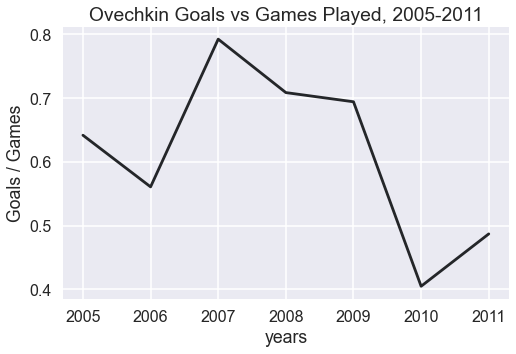

In [167]:
# construct goals vs games chart
style.use('seaborn-darkgrid')
style.use('seaborn-muted')
sns.set_palette(sns.dark_palette('#69d', 10))
plt.figure(figsize=(8,5))
sns.lineplot(data=ovechkin_score, x="year", y="G/GP")
plt.title('Ovechkin Goals vs Games Played, 2005-2011')
plt.xlabel('years')
plt.ylabel('Goals / Games')
plt.show
plt.savefig('charts/GoalsVsGames');

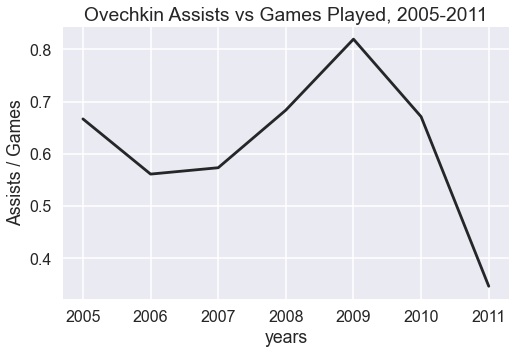

In [169]:
# construct assists vs games chart
style.use('seaborn-darkgrid')
style.use('seaborn-muted')
sns.set_palette(sns.dark_palette('#69d', 10))
plt.figure(figsize=(8,5))
sns.lineplot(data=ovechkin_score, x="year", y="A/GP")
plt.title('Ovechkin Assists vs Games Played, 2005-2011')
plt.xlabel('years')
plt.ylabel('Assists / Games')
plt.show
plt.savefig('charts/AssistsVsGames');

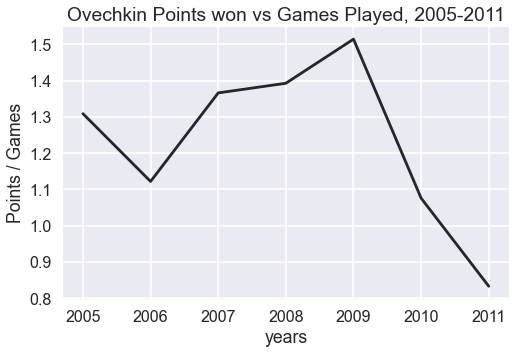

In [171]:
# construct pts vs games chart
style.use('seaborn-darkgrid')
style.use('seaborn-muted')
sns.set_palette(sns.dark_palette('#69d', 10))
plt.figure(figsize=(8,5))
sns.lineplot(data=ovechkin_score, x="year", y="Pts/GP")
plt.title('Ovechkin Points won vs Games Played, 2005-2011')
plt.xlabel('years')
plt.ylabel('Points / Games')
plt.show
plt.savefig('charts/PointsVsGames');

In [19]:
# average goals per game
statistics.mean(ovechkin_score['G'] / ovechkin_score['GP'])

0.6130259753548835

In [20]:
# average assists per game
statistics.mean(ovechkin_score['A'] / ovechkin_score['GP'])

0.6172630969250296

In [21]:
statistics.mean(ovechkin_score['Pts'] / ovechkin_score['GP'])

1.2302890722799131

In [ ]:
statistics.mean(ovechkin_score[''])

**Shootouts**

In [114]:
# read scoring shootouts csv file
shoot = pd.read_csv('data/ScoringShootout.csv')

In [ ]:
# pd.options.display.float_format = '{:.2%}'.format

In [115]:
# filter stats related to Ovechkin
ovechkin_shoot = shoot.loc[shoot['playerID'] == 'ovechal01']
ovechkin_shoot

,playerID,year,stint,tmID,S,G,GDG
1292,ovechal01,2005,1,WAS,13,6,3
1293,ovechal01,2006,1,WAS,12,2,0
1294,ovechal01,2007,1,WAS,6,1,0
1295,ovechal01,2008,1,WAS,7,2,0
1296,ovechal01,2009,1,WAS,9,2,1
1297,ovechal01,2010,1,WAS,10,4,3
1298,ovechal01,2011,1,WAS,3,8,0


In [116]:
# engineer a column of number of goals out of the number of shootouts
pd.options.mode.chained_assignment = None  # default='warn'
ovechkin_shoot['G/S'] = ovechkin_shoot.apply(lambda x: x['G'] if x['G'] < 1 else x['G']/x['S'], axis=1)
ovechkin_shoot

,playerID,year,stint,tmID,S,G,GDG,G/S
1292,ovechal01,2005,1,WAS,13,6,3,0.461538
1293,ovechal01,2006,1,WAS,12,2,0,0.166667
1294,ovechal01,2007,1,WAS,6,1,0,0.166667
1295,ovechal01,2008,1,WAS,7,2,0,0.285714
1296,ovechal01,2009,1,WAS,9,2,1,0.222222
1297,ovechal01,2010,1,WAS,10,4,3,0.400000
1298,ovechal01,2011,1,WAS,3,8,0,2.666667


In [122]:
# engineer a column of number of game deciding goals out of total goals
pd.options.mode.chained_assignment = None  # default='warn'
ovechkin_shoot['GDG/G'] = ovechkin_shoot.apply(lambda x: x['GDG'] if x['G'] < 1 or x['GDG'] < 1 else x['GDG']/x['G'], axis=1)

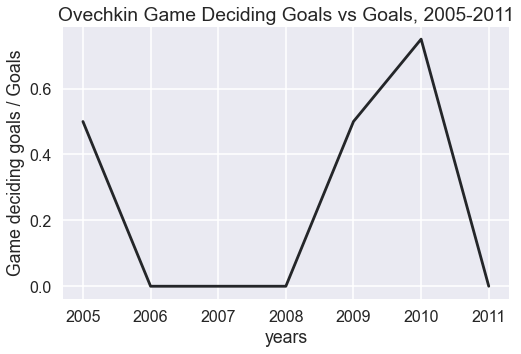

In [178]:
# construct game deciding goals vs goals chart
style.use('seaborn-darkgrid')
style.use('seaborn-muted')
sns.set_palette(sns.dark_palette('#69d', 10))
plt.figure(figsize=(8,5))
sns.lineplot(data=ovechkin_shoot, x="year", y="GDG/G")
plt.title('Ovechkin Game Deciding Goals vs Goals, 2005-2011')
plt.xlabel('years')
plt.ylabel('Game deciding goals / Goals')
plt.show;

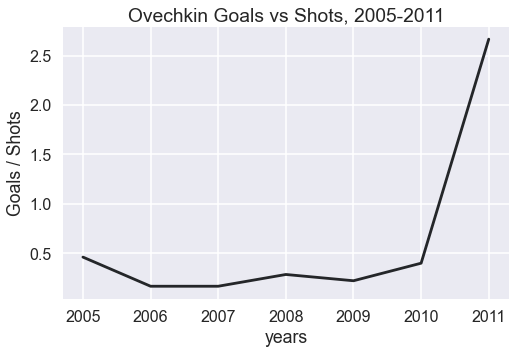

In [181]:
# construct goals vs shots chart
style.use('seaborn-darkgrid')
style.use('seaborn-muted')
sns.set_palette(sns.dark_palette('#69d', 10))
plt.figure(figsize=(8,5))
sns.lineplot(data=ovechkin_shoot, x="year", y="G/S")
plt.title('Ovechkin Goals vs Shots, 2005-2011')
plt.xlabel('years')
plt.ylabel('Goals / Shots')
plt.show;

In [44]:
# save to csv file
ovechkin_shoot.to_csv('data/ovechkin.csv', index=False)

In [24]:
# successful shootouts ratio
statistics.mean(ovechkin_shoot['G']/ovechkin_shoot['S'])

0.6242107099249956

In [25]:
# median of game deciding goals
statistics.median(ovechkin_shoot['GDG'])

0

In [26]:
# average game deciding goals
statistics.mean(ovechkin_shoot['GDG'])

1

**Concatenated Shootout and Scoring Dataframes**

In [56]:
# concatenate score and shoot dataframes
combined_df = pd.concat([ovechkin_shoot.assign(dataset='set1'), ovechkin_score.assign(dataset='set2')])

In [58]:
combined_df

,playerID,year,stint,tmID,S,G,GDG,G/S,dataset,lgID,...,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG,G/GP,A/GP,Pts/GP
1292,ovechal01,2005,1,WAS,13.0,6.0,3.0,0.461538,set1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1293,ovechal01,2006,1,WAS,12.0,2.0,0.0,0.166667,set1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1294,ovechal01,2007,1,WAS,6.0,1.0,0.0,0.166667,set1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1295,ovechal01,2008,1,WAS,7.0,2.0,0.0,0.285714,set1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1296,ovechal01,2009,1,WAS,9.0,2.0,1.0,0.222222,set1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1297,ovechal01,2010,1,WAS,10.0,4.0,3.0,0.400000,set1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1298,ovechal01,2011,1,WAS,3.0,8.0,0.0,2.666667,set1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31653,ovechal01,2005,1,WAS,NaN,52.0,NaN,NaN,set2,NHL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.641975,0.666667,1.308642
31654,ovechal01,2006,1,WAS,NaN,46.0,NaN,NaN,set2,NHL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.560976,0.560976,1.121951
31655,ovechal01,2007,1,WAS,NaN,65.0,NaN,NaN,set2,NHL,...,-1.0,1.0,5.0,0.0,0.0,2.0,37.0,0.792683,0.573171,1.365854


#### Washington Capitals Stats and Awards

**Series Wins & Losses**

In [27]:
# read series post csv file
series = pd.read_csv('data/SeriesPost.csv')

In [28]:
# see Capital's wins
was_wins = series.loc[series['tmIDWinner'] == 'WAS']
was_wins.head()

,year,round,series,tmIDWinner,lgIDWinner,tmIDLoser,lgIDLoser,W,L,T,GoalsWinner,GoalsLoser,note
415,1983,DSF,D,WAS,NHL,PHI,NHL,3,0,0,15,5,NaN
445,1985,DSF,D,WAS,NHL,NYI,NHL,3,0,0,11,4,NaN
475,1987,DSF,D,WAS,NHL,PHI,NHL,4,3,0,31,25,NaN
505,1989,DSF,D,WAS,NHL,NJD,NHL,4,2,0,21,18,NaN
511,1989,DF,J,WAS,NHL,NYR,NHL,4,1,0,22,15,NaN


In [29]:
# see Capitals' losses
was_losses = series.loc[series['tmIDLoser'] == 'WAS']
was_losses.head()

,year,round,series,tmIDWinner,lgIDWinner,tmIDLoser,lgIDLoser,W,L,T,GoalsWinner,GoalsLoser,note
400,1982,DSF,D,NYI,NHL,WAS,NHL,3,1,0,19,11,NaN
421,1983,DF,J,NYI,NHL,WAS,NHL,4,1,0,20,13,NaN
430,1984,DSF,D,NYI,NHL,WAS,NHL,3,2,0,14,12,NaN
451,1985,DF,J,NYR,NHL,WAS,NHL,4,2,0,20,25,NaN
460,1986,DSF,D,NYI,NHL,WAS,NHL,4,3,0,19,19,NaN


**Team vs Team Stats**

In [30]:
# read team vs team csv file
team_vs_team = pd.read_csv('data/TeamVsTeam.csv')

In [31]:
# explore Capitals' opponents
was_team_stats = team_vs_team.loc[team_vs_team['tmID'] == 'WAS']
was_team_stats.head()

,year,lgID,tmID,oppID,W,L,T,OTL
4199,1974,NHL,WAS,ATF,0,3,1.0,NaN
4200,1974,NHL,WAS,BOS,0,4,1.0,NaN
4201,1974,NHL,WAS,BUF,0,5,0.0,NaN
4202,1974,NHL,WAS,CHI,1,3,0.0,NaN
4203,1974,NHL,WAS,CLF,2,3,0.0,NaN


**Team Stats**

In [32]:
# read teams csv file
teams = pd.read_csv('data/Teams.csv')

In [33]:
# see Capitals' stats
was = teams.loc[teams['tmID'] == 'WAS']
was.head()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,G,W,...,GA,name,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
574,1974,NHL,WAS,WAS,WA,NO,5,NaN,80,8,...,446,Washington Capitals,1085.0,14.0,48.0,372.0,18.0,94.0,328.0,8.0
606,1975,NHL,WAS,WAS,WA,NO,5,NaN,80,11,...,394,Washington Capitals,951.0,8.0,53.0,375.0,3.0,64.0,252.0,2.0
638,1976,NHL,WAS,WAS,WA,NO,4,NaN,80,24,...,307,Washington Capitals,1231.0,16.0,39.0,293.0,14.0,62.0,285.0,10.0
668,1977,NHL,WAS,WAS,WA,NO,5,NaN,80,17,...,321,Washington Capitals,1332.0,10.0,34.0,278.0,15.0,73.0,260.0,2.0
695,1978,NHL,WAS,WAS,WA,NO,4,NaN,80,24,...,338,Washington Capitals,1312.0,20.0,57.0,302.0,12.0,83.0,279.0,5.0


**Teams Half Season**

In [34]:
# read teams half season csv file
teamshalf = pd.read_csv('data/TeamsHalf.csv')

In [35]:
# look at Capitals' performance 
was_half = teamshalf.loc[teamshalf['tmID'] == 'WAS']
was_half.head()

,year,lgID,tmID,half,rank,G,W,L,T,GF,GA


**Teams Post Seasons**

In [36]:
# read Teams post season csv file
teamspost = pd.read_csv('data/TeamsPost.csv')

In [37]:
# see Capitals' stats
was_post = teamspost.loc[teamspost['tmID'] == 'WAS']
was_post.head()

,year,lgID,tmID,G,W,L,T,GF,GA,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
477,1982,NHL,WAS,4,1,3,0,11,19,98.0,0.0,1.0,24.0,0.0,3.0,18.0,0.0
493,1983,NHL,WAS,8,4,4,0,28,25,161.0,2.0,10.0,38.0,1.0,5.0,25.0,0.0
509,1984,NHL,WAS,5,2,3,0,12,14,90.0,0.0,4.0,28.0,0.0,3.0,17.0,0.0
525,1985,NHL,WAS,9,5,4,0,36,24,209.0,0.0,9.0,40.0,1.0,7.0,36.0,2.0
541,1986,NHL,WAS,7,3,4,0,19,19,199.0,0.0,2.0,36.0,0.0,4.0,30.0,0.0


**Teams Stanley Cup**

In [38]:
# read teams stanley cup csv file
teamssc = pd.read_csv('data/TeamsSC.csv')

In [39]:
was_sc = teamssc.loc[teamssc['tmID'] == 'WAS'] # the data is up to 1925 and does not mention the Penguins
was_sc.head()

,year,lgID,tmID,G,W,L,T,GF,GA,PIM
